# Esame del 28/01/2018
## Il file rappresenta alcuni dati su studenti che frequentano 2 insegnamenti in 2 scuole diverse e il campo G3 la valutazione finale (da predire)

## Parte 1:
### 1.2:
 Quante sono le istanze contenute nel dataset? _______ Il dataset è bilanciato rispetto alle
scuole e ai generi degli studenti analizzati?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data/bdastudents.csv",sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,2,1,2
4,GP,F,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,5,4,2,1,2,5,4,1,1,1
1040,MS,F,18,U,0,T,3,1,teacher,services,...,4,3,4,1,1,1,4,2,2,2
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,1,5,6,1,1,1
1042,MS,M,17,U,0,T,3,1,services,services,...,2,4,5,3,4,2,6,1,1,1


In [2]:
df.shape[0]

1044

<AxesSubplot:xlabel='school'>

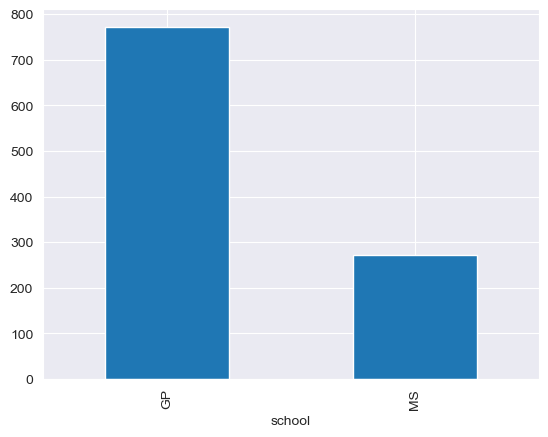

In [3]:
df.groupby("school")["age"].count().plot.bar()

<AxesSubplot:xlabel='sex'>

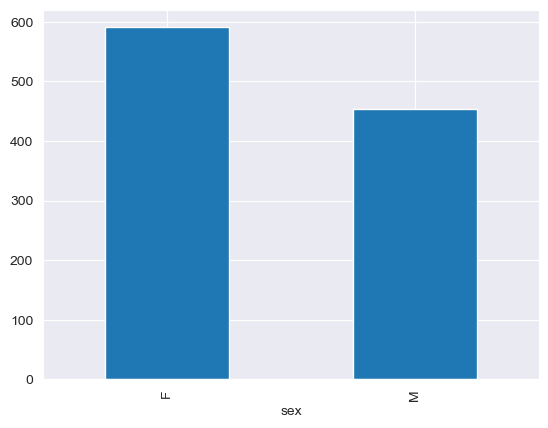

In [4]:
df.groupby("sex")["age"].count().plot.bar()

### 1.3
 Creare un nuovo attributo “GRate” che misuri per ogni studente la differenza tra la
valutazione ricevuta nel primo e nel secondo periodo

In [5]:
df["GRate"] = df["G1"] - df["G2"]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GRate
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,3,4,1,1,3,6,0,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,3,3,1,1,3,4,0,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,3,2,2,3,3,10,1,1,1,0
3,GP,F,15,U,1,T,4,2,health,services,...,2,2,1,1,5,2,2,1,2,1
4,GP,F,16,U,1,T,3,3,other,other,...,3,2,1,2,5,4,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,4,2,1,2,5,4,1,1,1,0
1040,MS,F,18,U,0,T,3,1,teacher,services,...,3,4,1,1,1,4,2,2,2,0
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,5,6,1,1,1,0
1042,MS,M,17,U,0,T,3,1,services,services,...,4,5,3,4,2,6,1,1,1,0


Realizzare un grafico che rappresenti per ogni età questa differenza

<AxesSubplot:xlabel='age'>

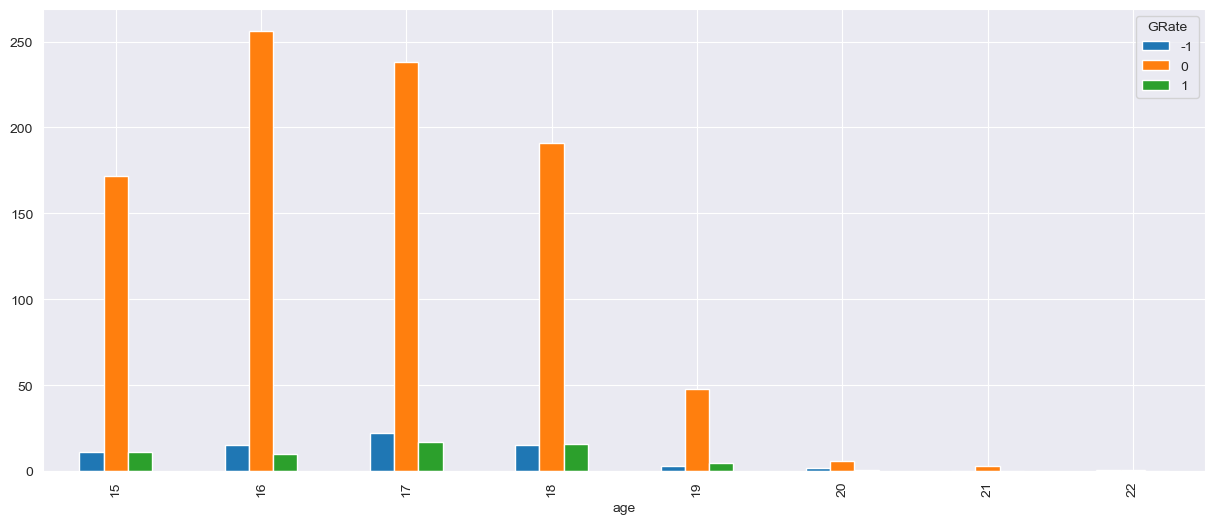

In [6]:
pd.pivot_table(df, 'sex', index='age', columns='GRate', aggfunc='count').plot(kind="bar",figsize=(15,6))

### 1.4
Sono mediamente più bravi (attributo G3) i ragazzi o le ragazze? Esistono delle variazioni
rilevanti nelle due scuole considerate?

In [7]:
new_df = df.copy()
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GRate
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,3,4,1,1,3,6,0,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,3,3,1,1,3,4,0,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,3,2,2,3,3,10,1,1,1,0
3,GP,F,15,U,1,T,4,2,health,services,...,2,2,1,1,5,2,2,1,2,1
4,GP,F,16,U,1,T,3,3,other,other,...,3,2,1,2,5,4,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,4,2,1,2,5,4,1,1,1,0
1040,MS,F,18,U,0,T,3,1,teacher,services,...,3,4,1,1,1,4,2,2,2,0
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,5,6,1,1,1,0
1042,MS,M,17,U,0,T,3,1,services,services,...,4,5,3,4,2,6,1,1,1,0


In [9]:
df_female = new_df.loc[new_df.sex == 'F']
df_male = new_df.loc[new_df.sex == 'M']
df_female

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GRate
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,3,4,1,1,3,6,0,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,3,3,1,1,3,4,0,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,3,2,2,3,3,10,1,1,1,0
3,GP,F,15,U,1,T,4,2,health,services,...,2,2,1,1,5,2,2,1,2,1
4,GP,F,16,U,1,T,3,3,other,other,...,3,2,1,2,5,4,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,MS,F,17,U,1,T,4,3,teacher,other,...,5,4,1,1,1,0,0,1,1,-1
1038,MS,F,18,R,1,T,4,4,teacher,at_home,...,4,3,2,2,5,4,1,1,1,0
1039,MS,F,19,R,1,T,2,3,services,other,...,4,2,1,2,5,4,1,1,1,0
1040,MS,F,18,U,0,T,3,1,teacher,services,...,3,4,1,1,1,4,2,2,2,0


In [13]:
df_female.groupby("G3")["age"].count() / len(new_df)

G3
0    0.045019
1    0.406130
2    0.114943
Name: age, dtype: float64

In [14]:
df_male.groupby("G3")["age"].count() / len(new_df)

G3
0    0.032567
1    0.320881
2    0.080460
Name: age, dtype: float64

<AxesSubplot:xlabel='sex'>

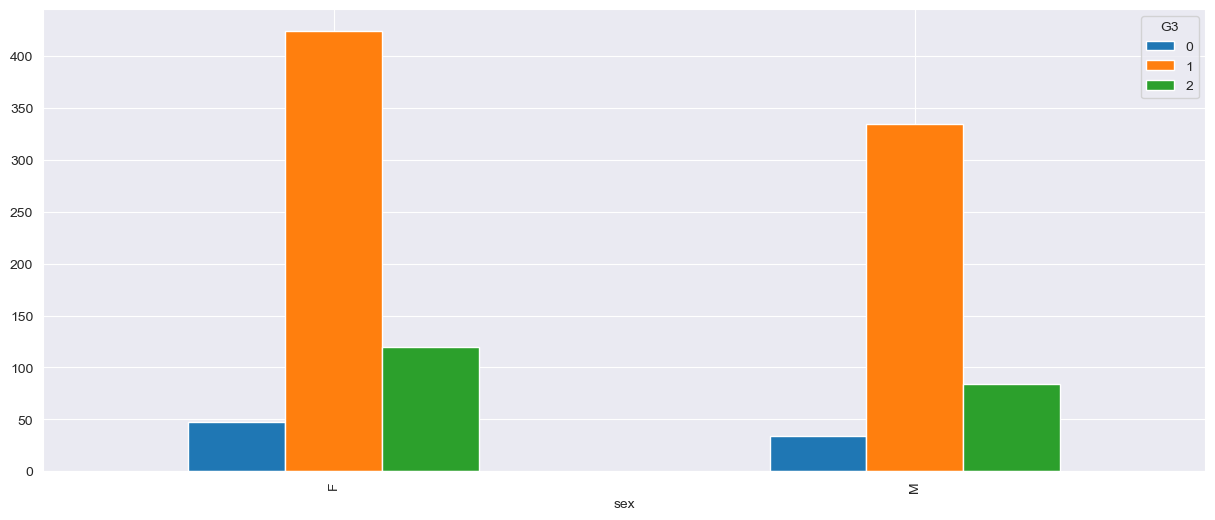

In [12]:
pd.pivot_table(new_df, 'age', index='sex', columns='G3', aggfunc='count').plot(kind="bar",figsize=(15,6))

<AxesSubplot:xlabel='school'>

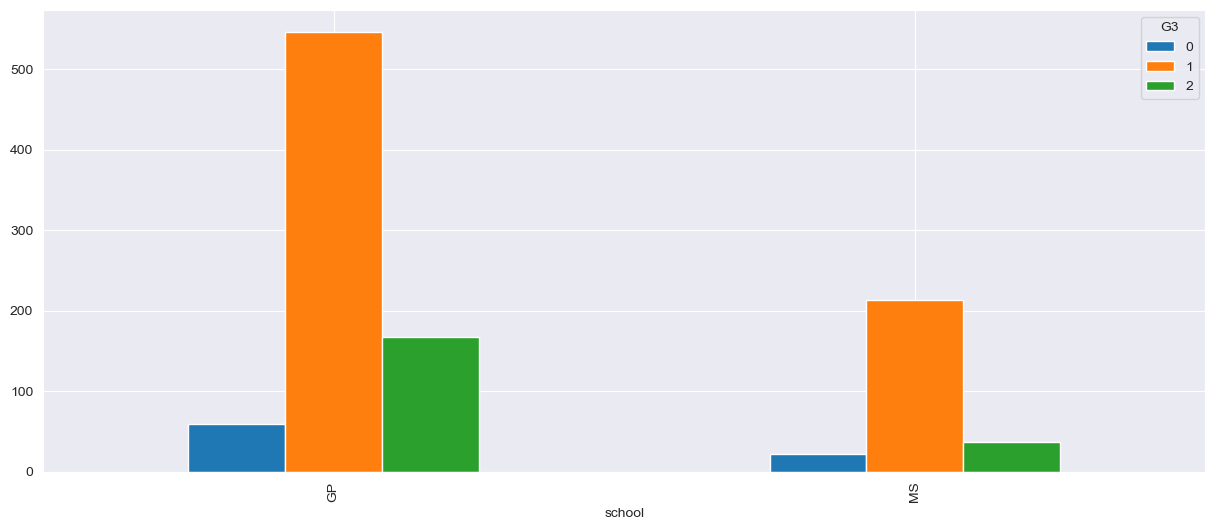

In [16]:
pd.pivot_table(new_df, 'age', index='school', columns='G3', aggfunc='count').plot(kind="bar",figsize=(15,6))

### Risposta:
1. Mediamente sono più brave le ragazze
2. Si esistono variazioni rilevanti

### 1.5
 Tra i genitori degli studenti considerati, il livello di “educazione” maschile e femminile varia?
Sono generalmente più scolarizzati i padri o le madri? Visualizzare poi un grafico che rappresenti
il concetto

In [46]:
Medu = new_df.groupby("Medu")["age"].count() / len(new_df)
Medu

Medu
0    0.008621
1    0.193487
2    0.276820
3    0.227969
4    0.293103
Name: age, dtype: float64

In [63]:
Fedu = new_df.groupby(["Fedu"])["age"].count() / len(new_df)
Fedu

Fedu
0    0.008621
1    0.245211
2    0.310345
3    0.221264
4    0.214559
Name: age, dtype: float64

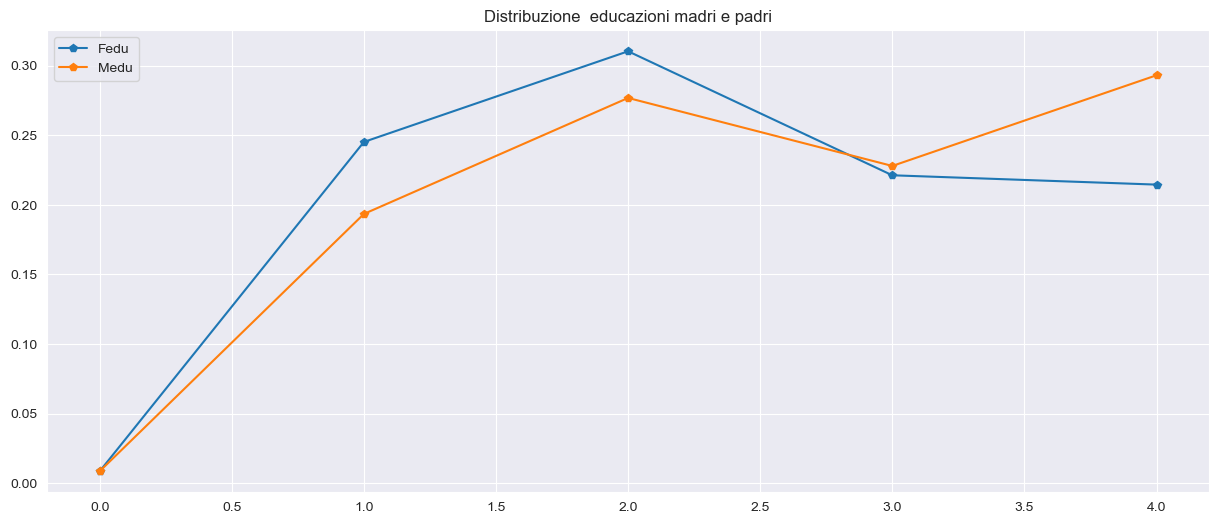

In [68]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1,figsize=(15,6))
line1 = ax.plot(Fedu,'p-',label="Fedu")
line2 = ax.plot(Medu,'p-',label="Medu")

ax.set_title("Distribuzione  educazioni madri e padri")
ax.legend(loc="best")

### 1.6:
 Indicare cosa visualizza l’istruzione
ds["G3"].groupby([ds["G3"],ds["address"]] ).count().plot()
Si tratta di una operazione significativa?

<AxesSubplot:xlabel='G3,address'>

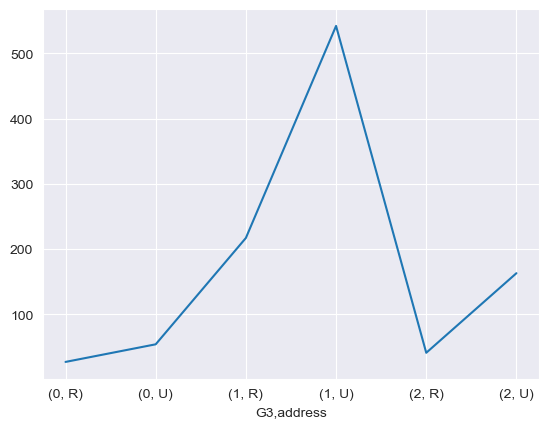

In [67]:
new_df["G3"].groupby([new_df["G3"],new_df["address"]]).count().plot()

### Risposta:
Mostra l'andamento della valutazione del corso, rapportata con la zona in cui vive lo studente:
Questa operazione non è significativa perchè non rappresenta una informazione discriminante per lo studio e non c'è presente nessun legame tra la zona in cui vive lo studente e la sua valutazione